In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [24]:
import pandas as pd
from datetime import datetime

def parse_timestamp(timestamp_str):
    try:
        return datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S,%f')
    except ValueError:
        return pd.NaT

df = pd.read_csv('/workspace/app.log', sep=' - ', engine='python', header=None, 
                 names=['timestamp', 'source', 'level', 'message'],
                 converters={'timestamp': parse_timestamp})

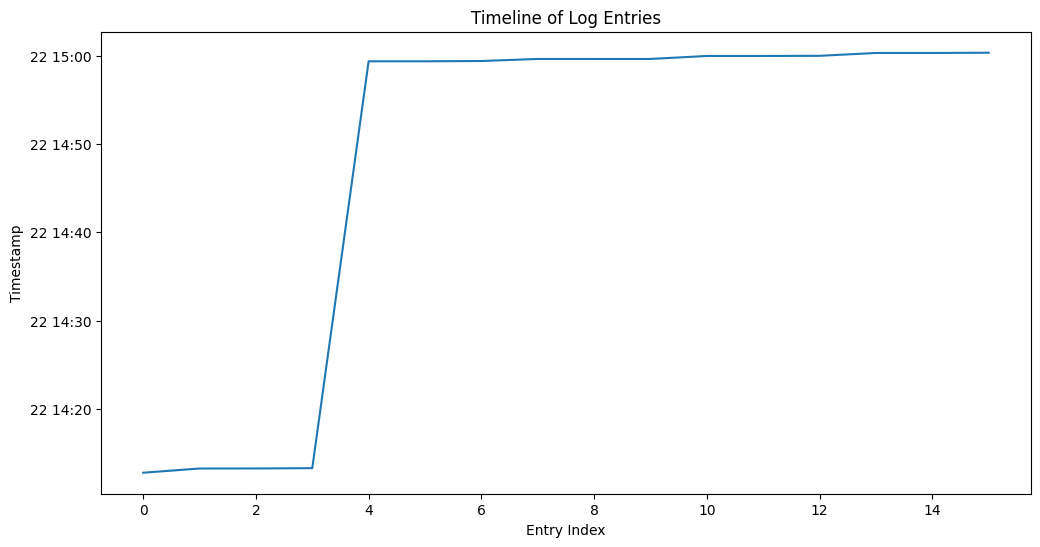

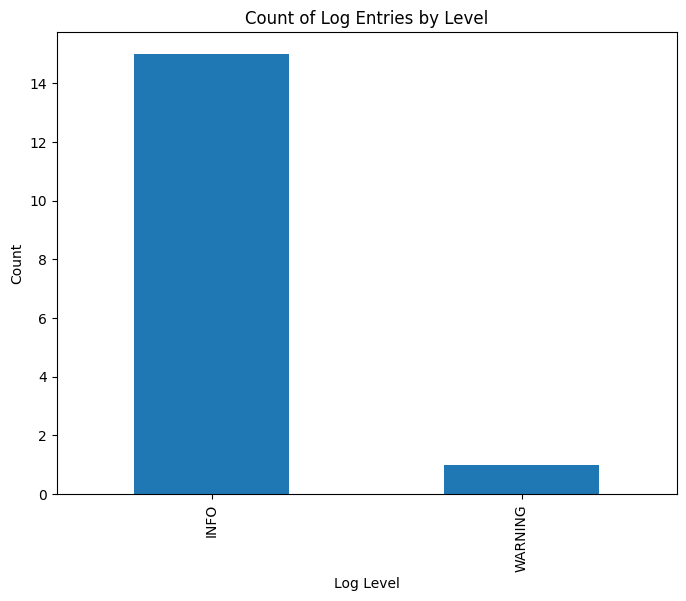

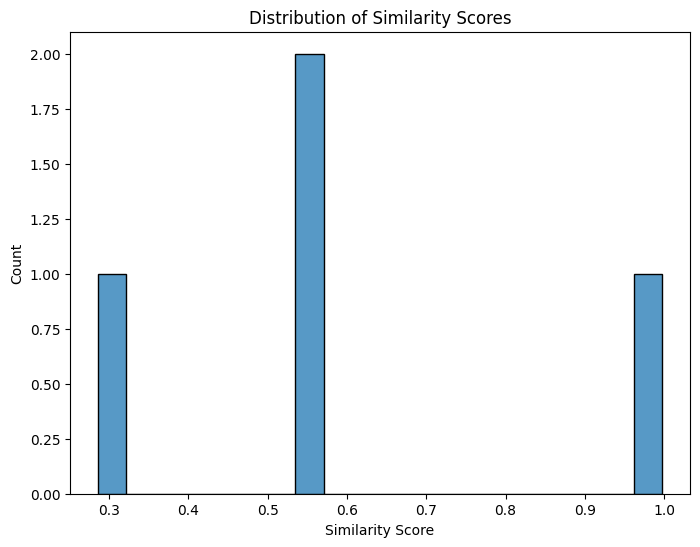

<Figure size 1200x600 with 0 Axes>

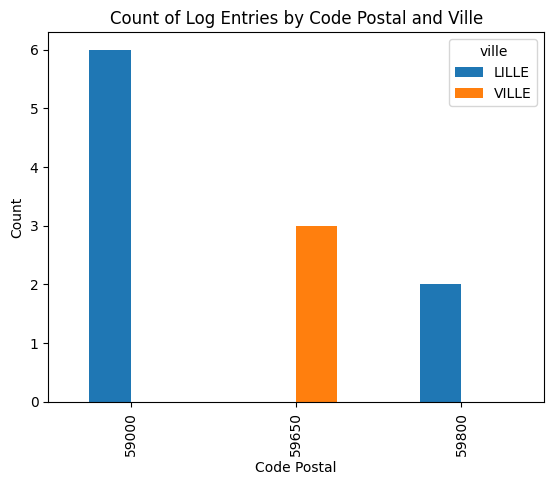

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the log data
df = pd.read_csv('/workspace/app.log', sep=' - ', engine='python', header=None, 
                 names=['timestamp', 'source', 'level', 'message'])

# Parse the log entries
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S,%f')
df['code_postal'] = df['message'].str.extract(r'code postal (\d+)')
df['ville'] = df['message'].str.extract(r'ville (\w+)')
df['rue'] = df['message'].str.extract(r'Verifying (\w+) for')
df['similarity_score'] = df['message'].str.extract(r"similarity_score': ([\d.]+)").astype(float, errors='ignore')

# Create visualizations

# 1. Timeline of log entries
plt.figure(figsize=(12, 6))
df['timestamp'].plot()
plt.title('Timeline of Log Entries')
plt.xlabel('Entry Index')
plt.ylabel('Timestamp')
plt.show()

# 2. Count of log entries by level
plt.figure(figsize=(8, 6))
df['level'].value_counts().plot(kind='bar')
plt.title('Count of Log Entries by Level')
plt.xlabel('Log Level')
plt.ylabel('Count')
plt.show()

# 3. Distribution of Similarity Scores
plt.figure(figsize=(8, 6))
sns.histplot(df['similarity_score'].dropna(), bins=20)
plt.title('Distribution of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Count')
plt.show()

# 4. Count of log entries by code postal and ville
plt.figure(figsize=(12, 6))
df.groupby(['code_postal', 'ville']).size().unstack().plot(kind='bar')
plt.title('Count of Log Entries by Code Postal and Ville')
plt.xlabel('Code Postal')
plt.ylabel('Count')
plt.show()

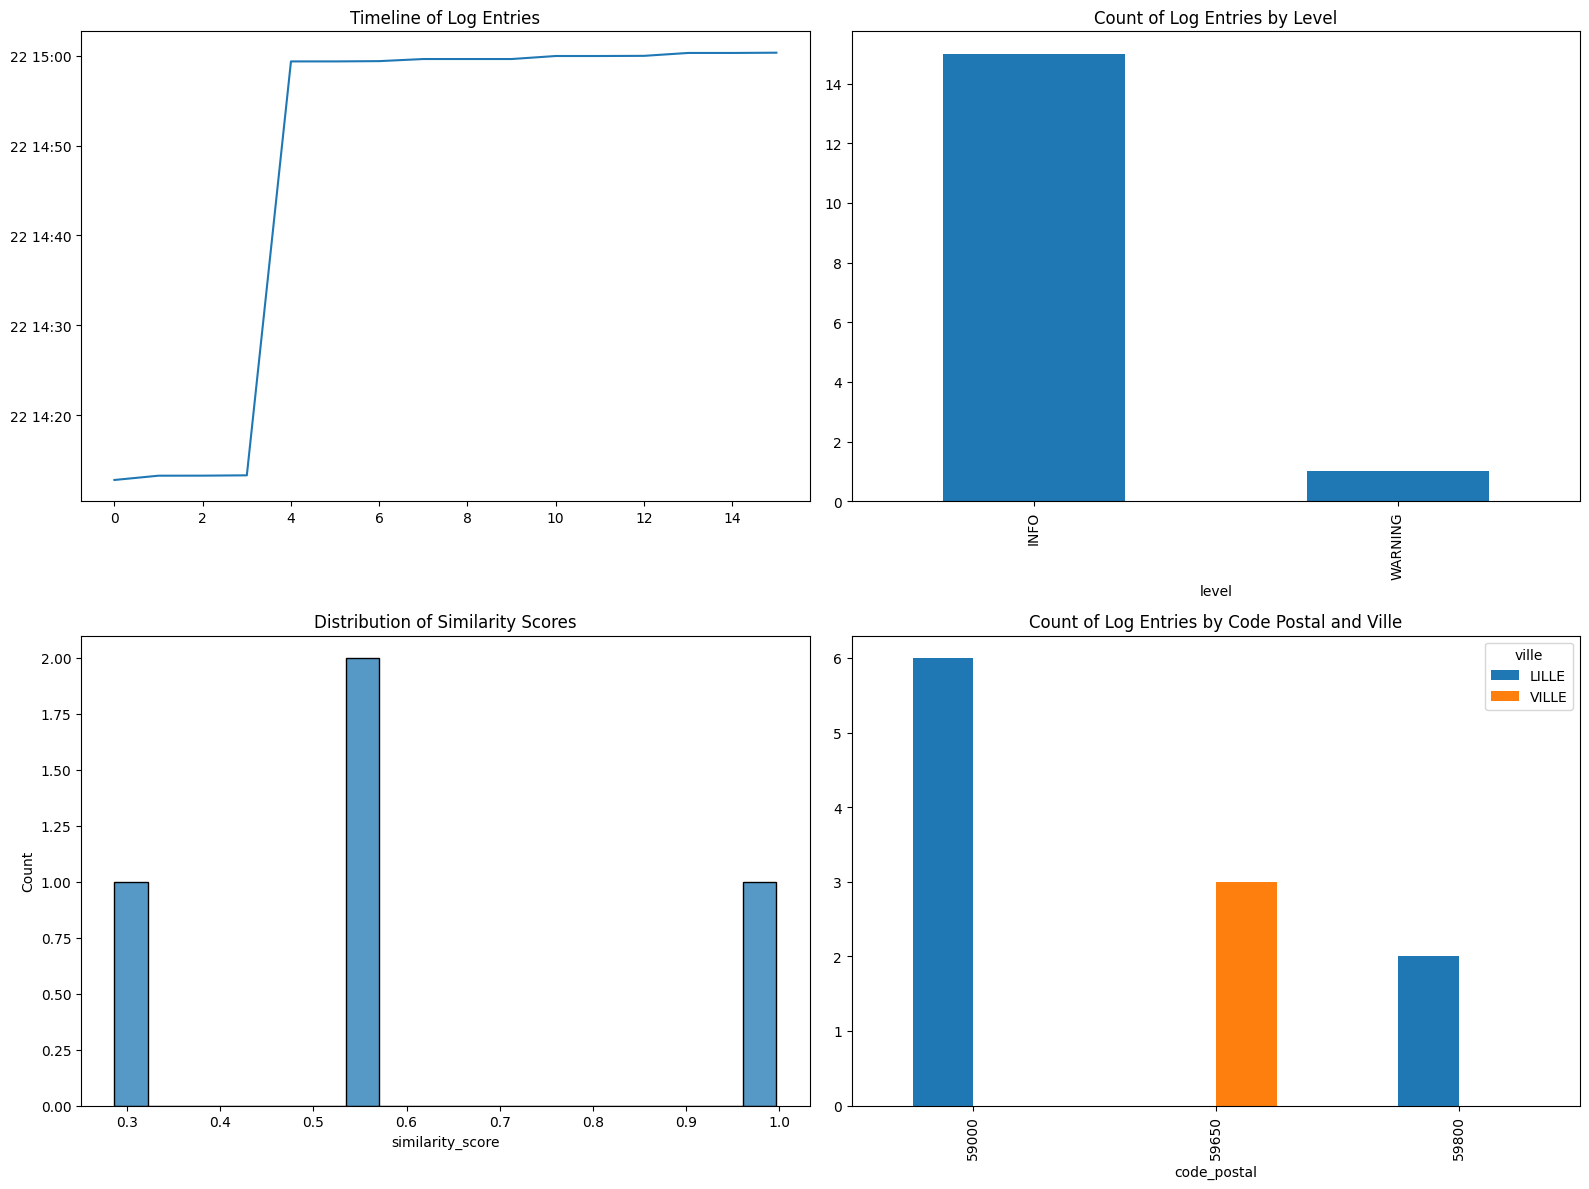

In [28]:
# Create a dashboard-style layout
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot the visualizations in the grid
df['timestamp'].plot(ax=axes[0, 0])
axes[0, 0].set_title('Timeline of Log Entries')
df['level'].value_counts().plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Count of Log Entries by Level')
sns.histplot(df['similarity_score'].dropna(), ax=axes[1, 0], bins=20)
axes[1, 0].set_title('Distribution of Similarity Scores')
df.groupby(['code_postal', 'ville']).size().unstack().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Count of Log Entries by Code Postal and Ville')

plt.tight_layout()
plt.show()